# Restaurant Recommender

Nov 2017

In [210]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
plt.style.use("ggplot")

In [211]:
df = pd.read_csv('last_2_years_restaurant_reviews.csv')

In [212]:
df.head()

,business_id,name,categories,ave_stars,cool,date,funny,review_id,stars,text,useful,user_id
0,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"[Steakhouses, Cajun/Creole, Restaurants]",4.0,0,2017-01-20,0,L8lo5SKXfZRlbn1bpPiC9w,5,Went here for guys weekend. Unbelievable. Ravi...,0,nT8zgjoc-PbdBoQsFEXFLw
1,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"[Steakhouses, Cajun/Creole, Restaurants]",4.0,1,2017-02-12,0,3cnTdE45VrsS0o4cVhfGog,3,"Located inside my favorite hotel Venetian, Del...",1,rOIrilMC7VFwFVBeQNiKMw
2,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"[Steakhouses, Cajun/Creole, Restaurants]",4.0,1,2017-04-18,0,QtLQQlmFINUSb2K_gE7J1Q,4,"Great food, great service. Expect to pay a pre...",1,ez3GBw83OIgzzgvc0R4jzw
3,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"[Steakhouses, Cajun/Creole, Restaurants]",4.0,0,2017-01-03,0,oqQsexnfmYxRO-0NvxJN9A,5,My must stop at Vegas. Highly recommend to any...,0,gJrOPH-DSZWY_NX2j6Bugw
4,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"[Steakhouses, Cajun/Creole, Restaurants]",4.0,0,2017-02-26,0,aw_5aKHlAzV0PSM7F92YFw,5,This place is top notch. We didn't order any a...,0,3Y_gz3wb7T5ur9FHqxBcgQ


## 1. Clean data and get rating data 

### Select relevant columns in the original dataframe

In [213]:
# Get business_id, user_id, stars for recommender
df_stars = df[['business_id', 'user_id', 'stars']]

In [214]:
# Stars distribution
df_stars['stars'].value_counts()

5    135184
4     59533
1     37332
3     31303
2     23745
Name: stars, dtype: int64

In [215]:
# Number of unique business_id
df_stars['business_id'].nunique() # count the number of unique elements

4290

In [216]:
# Number of unique user_id
df_stars['user_id'].nunique()

140737

In [217]:
# Count how many comments each user made
df_user_counts = df_stars['user_id'].value_counts()
df_user_counts.head()

bLbSNkLggFnqwNNzzq-Ijw    338
JaqcCU3nxReTW2cBLHounA    296
JQIZhoQB-Tg9hdBEj90m4g    134
PKEzKWv_FktMm2mGPjwd0Q    133
OXSJCjKtvZPf-YPDCXcWZg    131
Name: user_id, dtype: int64

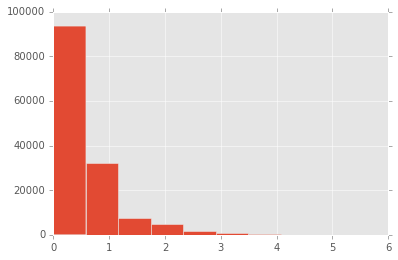

In [218]:
# Display log histogram
df_user_counts.apply(np.log).hist()
plt.show()

#### There are many users that haven't given many reviews, exclude these users from the item-item similarity recommender

**Q**: How do we recommend to these users anyway?
 We can recommend to these users with popularity based recommender

In [219]:
# To be implemented
# Check how many users only review once
df_user_counts[df_user_counts == 1].sum()

93513

In [220]:
# See how many users have reviewed for > 5 times
df_user_counts[df_user_counts > 5].shape

(7252,)

In [221]:
# These are defined as active users
df_users = df_user_counts[df_user_counts > 5]

In [222]:
# Number of active users
df_users.count()

7252

In [223]:
# Sum of comments from active users
df_users.sum()

85916

In [224]:
# Display active user id
df_users.index

Index([u'bLbSNkLggFnqwNNzzq-Ijw', u'JaqcCU3nxReTW2cBLHounA',
       u'JQIZhoQB-Tg9hdBEj90m4g', u'PKEzKWv_FktMm2mGPjwd0Q',
       u'OXSJCjKtvZPf-YPDCXcWZg', u'3nIuSCZk5f_2WWYMLN7h3w',
       u'B1829_hxXSEpDPEDJtYeIw', u'qPVtjjp8sNQ32p9860SR9Q',
       u'mrpDR4jeLYun7bLMbw5a4w', u'U4INQZOPSUaj8hMjLlZ3KA',
       ...
       u'fiSNYsnGkXuO60wsniQ4gg', u'AeK4R7na2pH9871OBoQU4Q',
       u'f4UOzbbwydfhqOic1PKYvg', u'QuiOIZivkg7Da9O03pBbUw',
       u'qJXoA6sxmiJ357nLeAIlGQ', u'qBvsNlxtqy8hPxx1C7HuVA',
       u'GCdc_CXrrkyfI8BqjIDEUw', u'-xVqWqhOMFN7X35ME-IA6w',
       u'cRZNzm1GnoRyOwGlf2RuDQ', u'rLWUqAv2HieO8aoOr8sT4Q'],
      dtype='object', length=7252)

In [225]:
df_stars.head()

,business_id,user_id,stars
0,--9e1ONYQuAa-CB_Rrw7Tw,nT8zgjoc-PbdBoQsFEXFLw,5
1,--9e1ONYQuAa-CB_Rrw7Tw,rOIrilMC7VFwFVBeQNiKMw,3
2,--9e1ONYQuAa-CB_Rrw7Tw,ez3GBw83OIgzzgvc0R4jzw,4
3,--9e1ONYQuAa-CB_Rrw7Tw,gJrOPH-DSZWY_NX2j6Bugw,5
4,--9e1ONYQuAa-CB_Rrw7Tw,3Y_gz3wb7T5ur9FHqxBcgQ,5


In [226]:
df_stars.set_index('user_id').head()

,business_id,stars
user_id,,
nT8zgjoc-PbdBoQsFEXFLw,--9e1ONYQuAa-CB_Rrw7Tw,5
rOIrilMC7VFwFVBeQNiKMw,--9e1ONYQuAa-CB_Rrw7Tw,3
ez3GBw83OIgzzgvc0R4jzw,--9e1ONYQuAa-CB_Rrw7Tw,4
gJrOPH-DSZWY_NX2j6Bugw,--9e1ONYQuAa-CB_Rrw7Tw,5
3Y_gz3wb7T5ur9FHqxBcgQ,--9e1ONYQuAa-CB_Rrw7Tw,5


In [227]:
df_stars.set_index('user_id').ix[df_users.index].head()

,business_id,stars
user_id,,
bLbSNkLggFnqwNNzzq-Ijw,0i9S0BejjRv0ZDwdO9XymA,3
bLbSNkLggFnqwNNzzq-Ijw,2QznyHGF0PuiYkrl5RU66A,4
bLbSNkLggFnqwNNzzq-Ijw,2WiMyg8-DoXQ8_R5qFc2iQ,3
bLbSNkLggFnqwNNzzq-Ijw,2vr2yGIzSehe_ITFamNpyw,3
bLbSNkLggFnqwNNzzq-Ijw,4Nj2ktP2NjCbv2aKeH3ZBg,4


In [228]:
df_stars.set_index('user_id').ix[df_users.index].reset_index().head()

,user_id,business_id,stars
0,bLbSNkLggFnqwNNzzq-Ijw,0i9S0BejjRv0ZDwdO9XymA,3
1,bLbSNkLggFnqwNNzzq-Ijw,2QznyHGF0PuiYkrl5RU66A,4
2,bLbSNkLggFnqwNNzzq-Ijw,2WiMyg8-DoXQ8_R5qFc2iQ,3
3,bLbSNkLggFnqwNNzzq-Ijw,2vr2yGIzSehe_ITFamNpyw,3
4,bLbSNkLggFnqwNNzzq-Ijw,4Nj2ktP2NjCbv2aKeH3ZBg,4


In [229]:
# Choose active users from the stars dataframe and sort df with user_id from most reivews to least
df_stars_cleaned = df_stars.set_index('user_id').ix[df_users.index].reset_index()
df_stars_cleaned.head()

,user_id,business_id,stars
0,bLbSNkLggFnqwNNzzq-Ijw,0i9S0BejjRv0ZDwdO9XymA,3
1,bLbSNkLggFnqwNNzzq-Ijw,2QznyHGF0PuiYkrl5RU66A,4
2,bLbSNkLggFnqwNNzzq-Ijw,2WiMyg8-DoXQ8_R5qFc2iQ,3
3,bLbSNkLggFnqwNNzzq-Ijw,2vr2yGIzSehe_ITFamNpyw,3
4,bLbSNkLggFnqwNNzzq-Ijw,4Nj2ktP2NjCbv2aKeH3ZBg,4


### Create utility matrix from the above records

In [230]:
# Conver dataframe to document, word like matrix
df_utility = pd.pivot_table(data = df_stars_cleaned,
                            values = 'stars', # fill each row with stars
                            index = 'user_id', # define rows
                            columns = 'business_id', # define columns
                            fill_value = 0) # fill missing with 0

In [231]:
df_utility.head()

business_id,--9e1ONYQuAa-CB_Rrw7Tw,-3zffZUHoY8bQjGfPSoBKQ,-8R_-EkGpUhBk55K9Dd4mg,-9YyInW1wapzdNZrhQJ9dg,-AD5PiuJHgdUcAK-Vxao2A,-Bf8BQ3yMk8U2f45r2DRKw,-BmqghX1sv7sgsxOIS2yAg,-Bv-HHUs8aHzDrdWcZHn8w,-C8sSrFqaCxp51pyo-fQLQ,-CQokjildrY7UZezXCdEBw,...,zkhBU5qW_zCy0q4OEtIrsA,zmltWmTpoBt5sCU-5Kzj-Q,znWHLW1pt19HzW1VY6KfCA,zp-K5s3pGTWuuaVBWo6WZA,zpoZ6WyQUYff18-z4ZU1mA,zsQk990PubOHjr1YcLkQFw,zt9RLUIU32fZYOBh2L0NNQ,zttcrQP4MxNS5X5itzStXg,zuwba6QEBIDZT0tJZmNhdQ,zwNC-Ow4eIMan2__bS9-rg
user_id,,,,,,,,,,,,,,,,,,,,,
--LUapetRSkZpFZ2d-MXLQ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
--ZNfWKj1VyVElRx6-g1fg,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,3,0,0,0,0
-0CYm85fllm43U7UQOe82w,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-0Hf2jiBo7hJdxYW0Y6PKQ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-2gOxVWcnBr5DclrrsWXCA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [232]:
df_utility.shape # totally 7252 user_id and 3911 business_id

(7252, 3911)

In [233]:
# Get the list of user id by taking out the index of the utility matrix
user_id_list = df_utility.index
user_id_list.shape

(7252,)

In [234]:
# Get the list of business id by taking out the columns of the utility matrix
item_id_list = df_utility.columns
item_id_list.shape

(3911,)

### Recommendation system with graphlab

In [235]:
import graphlab

## 2. Item-Item similarity recommender

### Let's reuse the ItemItemRecommender class derived from previous exercise

Hint: we need to make modification to accommodate the dense numpy array

### Note: used graphlab for the item-item recommender system.

In [236]:
df_stars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287097 entries, 0 to 287096
Data columns (total 3 columns):
business_id    287097 non-null object
user_id        287097 non-null object
stars          287097 non-null int64
dtypes: int64(1), object(2)
memory usage: 6.6+ MB


In [237]:
# To be implemented

sf_stars = graphlab.SFrame(df_stars)
sf_stars

business_id,user_id,stars
--9e1ONYQuAa-CB_Rrw7Tw,nT8zgjoc-PbdBoQsFEXFLw,5
--9e1ONYQuAa-CB_Rrw7Tw,rOIrilMC7VFwFVBeQNiKMw,3
--9e1ONYQuAa-CB_Rrw7Tw,ez3GBw83OIgzzgvc0R4jzw,4
--9e1ONYQuAa-CB_Rrw7Tw,gJrOPH-DSZWY_NX2j6Bugw,5
--9e1ONYQuAa-CB_Rrw7Tw,3Y_gz3wb7T5ur9FHqxBcgQ,5
--9e1ONYQuAa-CB_Rrw7Tw,b4bTks98idS6-hx5AT92WQ,5
--9e1ONYQuAa-CB_Rrw7Tw,quX8U7dnq5YN6h1P04ps4g,5
--9e1ONYQuAa-CB_Rrw7Tw,gcz5baFhV096VSrB9EESXw,4
--9e1ONYQuAa-CB_Rrw7Tw,WAzX3AaM6PQfzFJHaUF6xQ,5
--9e1ONYQuAa-CB_Rrw7Tw,1kr9EZFV3T_l-8KBkfPo5Q,3


In [238]:
# item-item recommender
item_item_rec = graphlab.recommender.item_similarity_recommender.create(sf_stars,
                                                                        user_id = 'user_id',
                                                                        item_id = 'business_id',
                                                                        target = 'stars')

Recsys training: model = item_similarity

Preparing data set.

Data has 287097 observations with 140737 users and 4290 items.

Data prepared in: 1.07769s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 14.759ms                       | 8.5        |

| 57.955ms                       | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 119.72ms                            | 0                | 0               |

| 431.469ms                           | 100              | 4290            |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 0.484086s

In [239]:
# for each user, recommend 3 items with highest score
item_item_rec_result = item_item_rec.recommend(k = 3, verbose = False)

In [240]:
item_item_rec_result

user_id,business_id,score,rank
nT8zgjoc-PbdBoQsFEXFLw,wZCdr3iLTE6aa9kiVxWJWQ,0.00712597370148,1
nT8zgjoc-PbdBoQsFEXFLw,DESv2ys6SjBKA4SyDtJvxw,0.00700567166011,2
nT8zgjoc-PbdBoQsFEXFLw,pKk7jCFIm96qDdk0laVT2w,0.00664258003235,3
rOIrilMC7VFwFVBeQNiKMw,RESDUcs7fIiihp38-d6_6g,0.0144354701042,1
rOIrilMC7VFwFVBeQNiKMw,eaNenRk_liZBERFFLCXqqQ,0.0128062367439,2
rOIrilMC7VFwFVBeQNiKMw,JPfi__QJAaRzmfh5aOyFEw,0.0105006247759,3
ez3GBw83OIgzzgvc0R4jzw,WI1xBMN_rEaVPOL9Ad2gpQ,0.0140845179558,1
ez3GBw83OIgzzgvc0R4jzw,rcaPajgKOJC2vo_l3xa42A,0.0138190984726,2
ez3GBw83OIgzzgvc0R4jzw,KXITXbKuE60WSUDs7NZVLQ,0.0127550959587,3
gJrOPH-DSZWY_NX2j6Bugw,WI1xBMN_rEaVPOL9Ad2gpQ,0.0140845179558,1


## 3. Matrix Factorization recommender


### Convert np.dataframe to graphlab.sframe

In [241]:
sf_stars = graphlab.SFrame(df_stars)
sf_stars

business_id,user_id,stars
--9e1ONYQuAa-CB_Rrw7Tw,nT8zgjoc-PbdBoQsFEXFLw,5
--9e1ONYQuAa-CB_Rrw7Tw,rOIrilMC7VFwFVBeQNiKMw,3
--9e1ONYQuAa-CB_Rrw7Tw,ez3GBw83OIgzzgvc0R4jzw,4
--9e1ONYQuAa-CB_Rrw7Tw,gJrOPH-DSZWY_NX2j6Bugw,5
--9e1ONYQuAa-CB_Rrw7Tw,3Y_gz3wb7T5ur9FHqxBcgQ,5
--9e1ONYQuAa-CB_Rrw7Tw,b4bTks98idS6-hx5AT92WQ,5
--9e1ONYQuAa-CB_Rrw7Tw,quX8U7dnq5YN6h1P04ps4g,5
--9e1ONYQuAa-CB_Rrw7Tw,gcz5baFhV096VSrB9EESXw,4
--9e1ONYQuAa-CB_Rrw7Tw,WAzX3AaM6PQfzFJHaUF6xQ,5
--9e1ONYQuAa-CB_Rrw7Tw,1kr9EZFV3T_l-8KBkfPo5Q,3


### Create a matrix factorization model

In [242]:
rec_stars = graphlab.recommender.factorization_recommender.create(
        sf_stars,
        user_id = 'user_id',
        item_id = 'business_id',
        target = 'stars',
        solver = 'als',
        side_data_factorization = False)

Recsys training: model = factorization_recommender

Preparing data set.

Data has 287097 observations with 140737 users and 4290 items.

Data prepared in: 0.592775s

Training factorization_recommender for recommendations.

+------------------------------+--------------------------------------------------+----------+

| Parameter                    | Description                                      | Value    |

+------------------------------+--------------------------------------------------+----------+

| num_factors                  | Factor Dimension                                 | 8        |

| regularization               | L2 Regularization on Factors                     | 1e-08    |

| max_iterations               | Maximum Number of Iterations                     | 50       |

| solver                       | Solver used for training                         | als      |

+------------------------------+--------------------------------------------------+----------+

+---------+--------------+------------------------+

| Iter.   | Elapsed time | RMSE                   |

+---------+--------------+------------------------+

| Initial | 74us         | NA                     |

+---------+--------------+------------------------+

| 0       | 416.052ms    | 0.780592               |

| 1       | 779.259ms    | 0.315282               |

| 2       | 1.13s        | 0.29535                |

| 3       | 1.48s        | 0.282538               |

| 4       | 1.84s        | 0.272868               |

| 5       | 2.22s        | 0.265107               |

| 6       | 2.55s        | 0.258694               |

| 7       | 2.90s        | 0.253252               |

| 8       | 3.25s        | 0.248525               |

| 9       | 3.61s        | 0.244344               |

| 10      | 3.98s        | 0.240579               |

| 11      | 4.35s        | 0.237182               |

| 12      | 4.69s        | 0.234099               |

| 13      | 5.06s        | 0.231267               |

| 14      | 5.44s        | 0.22866                |

| 15      | 5.79s        | 0.226255               |

| 16      | 6.15s        | 0.224031               |

| 17      | 6.51s        | 0.221974               |

| 18      | 6.86s        | 0.220067               |

| 19      | 7.19s        | 0.218295               |

| 20      | 7.56s        | 0.216638               |

| 21      | 7.92s        | 0.215078               |

| 22      | 8.30s        | 0.213607               |

| 23      | 8.71s        | 0.212219               |

| 24      | 9.07s        | 0.210902               |

| 25      | 9.44s        | 0.209651               |

| 26      | 9.79s        | 0.208459               |

| 27      | 10.15s       | 0.207316               |

| 28      | 10.52s       | 0.20622                |

| 29      | 10.88s       | 0.20517                |

| 30      | 11.25s       | 0.204164               |

| 31      | 11.60s       | 0.203194               |

| 32      | 11.94s       | 0.202257               |

| 33      | 12.31s       | 0.201354               |

| 34      | 12.65s       | 0.200484               |

| 35      | 13.00s       | 0.199648               |

| 36      | 13.37s       | 0.198844               |

| 37      | 13.71s       | 0.198068               |

| 38      | 14.06s       | 0.197318               |

| 39      | 14.41s       | 0.196591               |

| 40      | 14.74s       | 0.195883               |

| 41      | 15.07s       | 0.195196               |

| 42      | 15.43s       | 0.194528               |

| 43      | 15.77s       | 0.193879               |

| 44      | 16.12s       | 0.193248               |

| 45      | 16.52s       | 0.192633               |

| 46      | 16.86s       | 0.192034               |

| 47      | 17.23s       | 0.191449               |

| 48      | 17.58s       | 0.190879               |

| 49      | 17.91s       | 0.190322               |

| FINAL   | 17.91s       | 0.190322               |

+---------+--------------+------------------------+

Optimization Complete: Iteration limit reached.

### Call the predic method on the input data to get recommendation for one selected user id and one business id

In [243]:
selected_user = df_stars.user_id[0]
selected_user

'nT8zgjoc-PbdBoQsFEXFLw'

In [244]:
selected_business = df_stars.business_id[100]
selected_business

'-3zffZUHoY8bQjGfPSoBKQ'

In [245]:
one_datapoint_sf = graphlab.SFrame({'user_id' : [selected_user], 'business_id': [selected_business]})

In [246]:
one_datapoint_sf

business_id,user_id
-3zffZUHoY8bQjGfPSoBKQ,nT8zgjoc-PbdBoQsFEXFLw


In [247]:
df_stars.loc[(df_stars['business_id']== selected_business)& (df_stars['user_id'] == selected_user)]

,business_id,user_id,stars


In [248]:
print "predicted rating:", rec_stars.predict(one_datapoint_sf[0])
print "actual rating:", df_stars.loc[(df_stars['business_id']== selected_business) & (df_stars['user_id'] == selected_user)].stars

predicted rating: [3.907961827850223]
actual rating: Series([], Name: stars, dtype: int64)


### On the returned model object, call the list_fields method to see what kind of data is stored for your model.

In [249]:
rec_stars.list_fields()

['adagrad_momentum_weighting',
 'additional_iterations_if_unhealthy',
 'binary_target',
 'coefficients',
 'data_load_time',
 'init_random_sigma',
 'item_id',
 'item_side_data_column_names',
 'item_side_data_column_types',
 'linear_regularization',
 'max_iterations',
 'model_name',
 'nmf',
 'num_factors',
 'num_features',
 'num_item_side_features',
 'num_items',
 'num_observations',
 'num_tempering_iterations',
 'num_user_side_features',
 'num_users',
 'observation_data_column_names',
 'random_seed',
 'regularization',
 'regularization_type',
 'sgd_convergence_interval',
 'sgd_convergence_threshold',
 'sgd_max_trial_iterations',
 'sgd_sampling_block_size',
 'sgd_step_adjustment_interval',
 'sgd_step_size',
 'sgd_trial_sample_minimum_size',
 'sgd_trial_sample_proportion',
 'side_data_factorization',
 'solver',
 'step_size_decrease_rate',
 'target',
 'tempering_regularization_start_value',
 'track_exact_loss',
 'training_rmse',
 'training_stats',
 'training_time',
 'user_id',
 'user_side_

### Inspect the "coefficients" to check the what informatin is saved in the model

In [250]:
rec_stars['coefficients']

{'business_id': Columns:
 	business_id	str
 	linear_terms	float
 	factors	array
 
 Rows: 4290
 
 Data:
 +------------------------+--------------+-------------------------------+
 |      business_id       | linear_terms |            factors            |
 +------------------------+--------------+-------------------------------+
 | --9e1ONYQuAa-CB_Rrw7Tw |     0.0      | [0.48341602087, -0.3569890... |
 | -3zffZUHoY8bQjGfPSoBKQ |     0.0      | [-0.277254730463, -1.01894... |
 | -8R_-EkGpUhBk55K9Dd4mg |     0.0      | [0.54052054882, 2.33945679... |
 | -9YyInW1wapzdNZrhQJ9dg |     0.0      | [0.203180044889, 2.4688575... |
 | -AD5PiuJHgdUcAK-Vxao2A |     0.0      | [1.36119782925, 0.38893967... |
 | -Bf8BQ3yMk8U2f45r2DRKw |     0.0      | [0.0506986305118, -0.16181... |
 | -BmqghX1sv7sgsxOIS2yAg |     0.0      | [0.720130980015, -1.286289... |
 | -Bv-HHUs8aHzDrdWcZHn8w |     0.0      | [-0.241145342588, 1.034014... |
 | -C8sSrFqaCxp51pyo-fQLQ |     0.0      | [0.0607197731733, 0.406116...

### Check the dimensions of the 'business_id' and 'user_id' arrays in the "coefficients".

In [251]:
business_sf = rec_stars['coefficients']['business_id']
print business_sf.shape
print len(business_sf['factors'][0]) # default number of factors is 8

(4290, 3)
8


In [252]:
user_sf = rec_stars['coefficients']['user_id']
print user_sf.shape
print len(user_sf['factors'][0]) # default number of factors is 8

(140737, 3)
8


In [253]:
print rec_stars['coefficients']['intercept']

3.80631981525


### Without using the predict method, compute the predicted rating for selected user and movie 

In [254]:
business_array = business_sf[business_sf['business_id'] == selected_business]['factors'][0]
business_array

array('d', [-0.27725473046302795, -1.0189484357833862, -1.3230388164520264, 0.37040600180625916, -0.7035056948661804, -1.343342661857605, -0.8030795454978943, -0.9455345869064331])

In [255]:
user_array = user_sf[user_sf['user_id'] == selected_user]['factors'][0]
user_array

array('d', [-1.1107287406921387, 0.9322246313095093, 0.8028544187545776, 0.273590624332428, -0.37760624289512634, -0.27265992760658264, 0.6319060921669006, -1.6710028648376465])

In [256]:
intercept = rec_stars['coefficients']['intercept']
intercept

3.8063198152540925

In [257]:
print "calculted predict rating:", np.dot(business_array, user_array) + intercept

calculted predict rating: 3.90796183377


### Same as using rec_stars.predict method

### Understanding the intercept term.

In [258]:
print "intercept:", intercept
print "average:", np.average(sf_stars['stars'])

intercept: 3.80631981525
average: 3.80631981525


### Call the predict method on the input data and predict the rating. Then verify the RMS reported by the model diagnostics is correct.

In [259]:
df_stars.head(5)

,business_id,user_id,stars
0,--9e1ONYQuAa-CB_Rrw7Tw,nT8zgjoc-PbdBoQsFEXFLw,5
1,--9e1ONYQuAa-CB_Rrw7Tw,rOIrilMC7VFwFVBeQNiKMw,3
2,--9e1ONYQuAa-CB_Rrw7Tw,ez3GBw83OIgzzgvc0R4jzw,4
3,--9e1ONYQuAa-CB_Rrw7Tw,gJrOPH-DSZWY_NX2j6Bugw,5
4,--9e1ONYQuAa-CB_Rrw7Tw,3Y_gz3wb7T5ur9FHqxBcgQ,5


In [260]:
predictions.head(5)

dtype: float
Rows: 5
[4.996172768211226, 3.007716757392745, 3.9994736138342426, 4.996755701637129, 5.001009804344038]

In [261]:
from sklearn.metrics import mean_squared_error

predictions = rec_stars.predict(sf_stars)
rmse = np.sqrt(mean_squared_error(sf_stars['stars'], predictions))

print "graphlab's reported rmse:", rec_stars['training_rmse']
print "calulated rmse:", rmse

graphlab's reported rmse: 0.190322496154
calulated rmse: 0.190322496154


### Compare the summary statistics of the original data with predictions.

In [262]:
pd.Series(sf_stars['stars']).describe()

count    287097.000000
mean          3.806320
std           1.429516
min           1.000000
25%           3.000000
50%           4.000000
75%           5.000000
max           5.000000
dtype: float64

In [263]:
pd.Series(predictions).describe()

count    287097.000000
mean          3.799732
std           1.416555
min           0.255816
25%           2.998796
50%           4.013381
75%           4.999412
max           6.395660
dtype: float64

### The std, 25%, 50% and 75% quantiles are very close for original data and predicitons. But the min and max of the predictions are different from the original data.

### Add regularizations to the model

Compare the rmse with L2 regularization = 0 and 1e-5.

In [264]:
random_seed = 0
rec_stars2 = graphlab.recommender.factorization_recommender.create(
        sf_stars,
        user_id = 'user_id',
        item_id = 'business_id',
        target = 'stars',
        solver = 'als',
        side_data_factorization = False,
        regularization = 0,
        random_seed = random_seed)


Recsys training: model = factorization_recommender

Preparing data set.

Data has 287097 observations with 140737 users and 4290 items.

Data prepared in: 0.767735s

Training factorization_recommender for recommendations.

+------------------------------+--------------------------------------------------+----------+

| Parameter                    | Description                                      | Value    |

+------------------------------+--------------------------------------------------+----------+

| num_factors                  | Factor Dimension                                 | 8        |

| regularization               | L2 Regularization on Factors                     | 0        |

| max_iterations               | Maximum Number of Iterations                     | 50       |

| solver                       | Solver used for training                         | als      |

+------------------------------+--------------------------------------------------+----------+

+---------+--------------+------------------------+

| Iter.   | Elapsed time | RMSE                   |

+---------+--------------+------------------------+

| Initial | 94us         | NA                     |

+---------+--------------+------------------------+

| 0       | 564.851ms    | 0.45941                |

| 1       | 1.00s        | 0.353022               |

| 2       | 1.36s        | 0.31772                |

| 3       | 1.74s        | 0.295959               |

| 4       | 2.10s        | 0.280678               |

| 5       | 2.48s        | 0.269055               |

| 6       | 2.85s        | 0.259809               |

| 7       | 3.21s        | 0.252206               |

| 8       | 3.57s        | 0.245846               |

| 9       | 3.97s        | 0.241364               |

| 10      | 4.34s        | 0.235739               |

| 11      | 4.71s        | 0.231557               |

| 12      | 5.18s        | 0.22796                |

| 13      | 5.53s        | 0.224763               |

| 14      | 5.88s        | 0.221777               |

| 15      | 6.21s        | 0.219418               |

| 16      | 6.56s        | 0.217589               |

| 17      | 6.90s        | 0.215742               |

| 18      | 7.27s        | 0.213478               |

| 19      | 7.61s        | 0.211848               |

| 20      | 7.95s        | 0.211217               |

| 21      | 8.31s        | 0.210236               |

| 22      | 8.64s        | 0.207894               |

| 23      | 8.97s        | 0.206404               |

| 24      | 9.31s        | 0.204293               |

| 25      | 9.67s        | 0.206116               |

| 26      | 10.05s       | 0.204428               |

| 27      | 10.46s       | 0.20326                |

| 28      | 10.86s       | 0.202437               |

| 29      | 11.23s       | 0.200863               |

| 30      | 11.58s       | 0.200763               |

| 31      | 11.94s       | 0.223076               |

| 32      | 12.36s       | 0.200715               |

| 33      | 13.12s       | 0.199354               |

| 34      | 13.70s       | 0.201234               |

| 35      | 14.35s       | 0.196795               |

| 36      | 14.77s       | 0.196875               |

| 37      | 15.25s       | 0.196694               |

| 38      | 15.74s       | 0.197657               |

| 39      | 16.23s       | 0.196228               |

| 40      | 16.68s       | 0.196192               |

| 41      | 17.15s       | 0.195181               |

| 42      | 17.58s       | 0.195507               |

| 43      | 17.98s       | 0.197513               |

| 44      | 18.40s       | 0.22947                |

| 45      | 18.85s       | 0.195247               |

| 46      | 19.25s       | 0.1931                 |

| 47      | 19.59s       | 0.193617               |

| 48      | 19.93s       | 0.196689               |

| 49      | 20.28s       | 0.196812               |

| FINAL   | 20.28s       | 0.196812               |

+---------+--------------+------------------------+

Optimization Complete: Iteration limit reached.

In [265]:
regularization_param = 1e-5
rec_stars3 = graphlab.recommender.factorization_recommender.create(
        sf_stars,
        user_id = 'user_id',
        item_id = 'business_id',
        target = 'stars',
        solver = 'als',
        side_data_factorization = False,
        regularization = regularization_param,
        random_seed = random_seed)

Recsys training: model = factorization_recommender

Preparing data set.

Data has 287097 observations with 140737 users and 4290 items.

Data prepared in: 0.897019s

Training factorization_recommender for recommendations.

+------------------------------+--------------------------------------------------+----------+

| Parameter                    | Description                                      | Value    |

+------------------------------+--------------------------------------------------+----------+

| num_factors                  | Factor Dimension                                 | 8        |

| regularization               | L2 Regularization on Factors                     | 1e-05    |

| max_iterations               | Maximum Number of Iterations                     | 50       |

| solver                       | Solver used for training                         | als      |

+------------------------------+--------------------------------------------------+----------+

+---------+--------------+------------------------+

| Iter.   | Elapsed time | RMSE                   |

+---------+--------------+------------------------+

| Initial | 125us        | NA                     |

+---------+--------------+------------------------+

| 0       | 457.452ms    | 1.42944                |

| 1       | 840.459ms    | 1.26122                |

| 2       | 1.28s        | 0.67703                |

| 3       | 1.67s        | 0.486521               |

| 4       | 2.08s        | 0.460919               |

| 5       | 2.63s        | 0.450058               |

| 6       | 3.09s        | 0.442772               |

| 7       | 3.69s        | 0.437373               |

| 8       | 4.30s        | 0.43315                |

| 9       | 4.83s        | 0.429716               |

| 10      | 5.25s        | 0.426877               |

| 11      | 5.65s        | 0.424514               |

| 12      | 6.11s        | 0.422507               |

| 13      | 6.54s        | 0.420758               |

| 14      | 6.96s        | 0.419206               |

| 15      | 7.32s        | 0.417809               |

| 16      | 7.70s        | 0.41654                |

| 17      | 8.06s        | 0.415377               |

| 18      | 8.47s        | 0.414304               |

| 19      | 8.83s        | 0.413311               |

| 20      | 9.16s        | 0.412391               |

| 21      | 9.51s        | 0.411541               |

| 22      | 9.85s        | 0.410753               |

| 23      | 10.21s       | 0.410022               |

| 24      | 10.60s       | 0.409341               |

| 25      | 10.96s       | 0.408704               |

| 26      | 11.33s       | 0.408107               |

| 27      | 11.71s       | 0.407545               |

| 28      | 12.14s       | 0.407016               |

| 29      | 12.54s       | 0.406519               |

| 30      | 12.91s       | 0.406049               |

| 31      | 13.27s       | 0.405607               |

| 32      | 13.62s       | 0.405189               |

| 33      | 14.00s       | 0.404792               |

| 34      | 14.40s       | 0.404416               |

| 35      | 14.75s       | 0.404057               |

| 36      | 15.17s       | 0.403714               |

| 37      | 15.53s       | 0.403386               |

| 38      | 15.88s       | 0.403071               |

| 39      | 16.32s       | 0.402768               |

| 40      | 16.77s       | 0.402476               |

| 41      | 17.13s       | 0.402195               |

| 42      | 17.57s       | 0.401923               |

| 43      | 17.96s       | 0.401659               |

| 44      | 18.31s       | 0.401404               |

| 45      | 18.71s       | 0.401155               |

| 46      | 19.03s       | 0.400913               |

| 47      | 19.35s       | 0.400677               |

| 48      | 19.69s       | 0.400447               |

| 49      | 20.07s       | 0.400223               |

| FINAL   | 20.07s       | 0.400223               |

+---------+--------------+------------------------+

Optimization Complete: Iteration limit reached.

In [266]:
print "training rmse with regularization 0:", rec_stars2['training_rmse'] 
print "training rmse with regularization %s:" %regularization_param, rec_stars3['training_rmse'] 

training rmse with regularization 0: 0.196812037277
training rmse with regularization 1e-05: 0.400222600291


### With even a very small regularization, the rmse become larger. 

### Get some sense from the latent features.

In [267]:
lf_df = df_stars.set_index(['user_id','business_id'])[['stars']].unstack().fillna(0)
lf_df.head() # same as utility matrix

stars                         \
business_id            --9e1ONYQuAa-CB_Rrw7Tw -3zffZUHoY8bQjGfPSoBKQ   
user_id                                                                
---1lKK3aKOuomHnwAkAow                    0.0                    0.0   
---udAKDsn0yQXmzbWQNSw                    0.0                    0.0   
--0sXNBv6IizZXuV-nl0Aw                    0.0                    0.0   
--2bpE5vyR-2hAP7sZZ4lA                    0.0                    0.0   
--3WaS23LcIXtxyFULJHTA                    0.0                    0.0   

                                                                      \
business_id            -8R_-EkGpUhBk55K9Dd4mg -9YyInW1wapzdNZrhQJ9dg   
user_id                                                                
---1lKK3aKOuomHnwAkAow                    0.0                    0.0   
---udAKDsn0yQXmzbWQNSw                    0.0                    0.0   
--0sXNBv6IizZXuV-nl0Aw                    0.0                    0.0   
--2bpE5vyR-2hAP7sZZ4lA                    0.0                    0.0   
--3WaS23LcIXtxyFULJHTA                    0.0                    0.0   

                                                                      \
business_id            -AD5PiuJHgdUcAK-Vxao2A -Bf8BQ3yMk8U2f45r2DRKw   
user_id                                                                
---1lKK3aKOuomHnwAkAow                    0.0                    0.0   
---udAKDsn0yQXmzbWQNSw                    0.0                    0.0   
--0sXNBv6IizZXuV-nl0Aw                    0.0                    0.0   
--2bpE5vyR-2hAP7sZZ4lA                    0.0                    0.0   
--3WaS23LcIXtxyFULJHTA                    0.0                    0.0   

                                                                      \
business_id            -BmqghX1sv7sgsxOIS2yAg -Bv-HHUs8aHzDrdWcZHn8w   
user_id                                                                
---1lKK3aKOuomHnwAkAow                    0.0                    0.0   
---udAKDsn0yQXmzbWQNSw                    0.0                    0.0   
--0sXNBv6IizZXuV-nl0Aw                    0.0                    0.0   
--2bpE5vyR-2hAP7sZZ4lA                    0.0                    0.0   
--3WaS23LcIXtxyFULJHTA                    0.0                    0.0   

                                                                      \
business_id            -C8sSrFqaCxp51pyo-fQLQ -CQokjildrY7UZezXCdEBw   
user_id                                                                
---1lKK3aKOuomHnwAkAow                    0.0                    0.0   
---udAKDsn0yQXmzbWQNSw                    0.0                    0.0   
--0sXNBv6IizZXuV-nl0Aw                    0.0                    0.0   
--2bpE5vyR-2hAP7sZZ4lA                    0.0                    0.0   
--3WaS23LcIXtxyFULJHTA                    0.0                    0.0   

                                ...                                   \
business_id                     ...           zkhBU5qW_zCy0q4OEtIrsA   
user_id                         ...                                    
---1lKK3aKOuomHnwAkAow          ...                              0.0   
---udAKDsn0yQXmzbWQNSw          ...                              0.0   
--0sXNBv6IizZXuV-nl0Aw          ...                              0.0   
--2bpE5vyR-2hAP7sZZ4lA          ...                              0.0   
--3WaS23LcIXtxyFULJHTA          ...                              0.0   

                                                                      \
business_id            zmltWmTpoBt5sCU-5Kzj-Q znWHLW1pt19HzW1VY6KfCA   
user_id                                                                
---1lKK3aKOuomHnwAkAow                    0.0                    0.0   
---udAKDsn0yQXmzbWQNSw                    0.0                    0.0   
--0sXNBv6IizZXuV-nl0Aw                    0.0                    0.0   
--2bpE5vyR-2hAP7sZZ4lA                    0.0                    0.0   
--3WaS23LcIXtxyFULJHTA                    0.0                    0.0   

 

In [268]:
user_df = user_sf[['user_id', 'factors']].sort('user_id').unpack('factors').to_dataframe().set_index('user_id')
user_df.head()

,factors.0,factors.1,factors.2,factors.3,factors.4,factors.5,factors.6,factors.7
user_id,,,,,,,,
---1lKK3aKOuomHnwAkAow,-0.322118,0.521553,-0.065029,-0.306137,0.697227,-0.040577,-0.341919,-0.176804
---udAKDsn0yQXmzbWQNSw,-0.009390,0.113459,-0.027251,0.028218,0.037270,0.062939,0.006019,-0.000345
--0sXNBv6IizZXuV-nl0Aw,-0.072523,-0.721330,0.459010,0.206318,0.489633,-0.326217,-0.486183,0.033627
--2bpE5vyR-2hAP7sZZ4lA,-0.050831,0.072276,0.058389,0.005469,0.060753,-0.026640,-0.050584,0.021491
--3WaS23LcIXtxyFULJHTA,-0.915122,-0.210420,-0.829367,0.049690,-0.995918,-0.596356,-0.807815,0.746851


In [269]:
len(lf_df.values) # number of unique users

140737

In [270]:
len(user_df.values) # number of unique users

140737

In [271]:
# Calculate the correlation between each movie and each factor
from scipy.spatial.distance import cdist
corr = cdist(lf_df.values.T, user_df.values.T, 'correlation')
corr_df = pd.DataFrame(corr)

corr_df.head()

,0,1,2,3,4,5,6,7
0,0.990881,0.997119,0.996395,1.007375,1.015554,0.997601,0.994828,1.011526
1,0.996931,1.003776,1.006321,0.999654,0.995794,1.006341,1.002223,1.000885
2,1.003748,0.995638,1.003256,0.995051,0.994946,1.002240,1.000739,0.994914
3,1.003080,1.003295,1.002987,1.004978,0.996970,1.000740,0.996698,0.996947
4,1.003837,0.999570,1.009254,1.005136,1.000495,1.000192,0.997452,0.992400


In [272]:
corr_df.index = lf_df.columns.get_level_values(1)

In [273]:
corr_df.head()

,0,1,2,3,4,5,6,7
business_id,,,,,,,,
--9e1ONYQuAa-CB_Rrw7Tw,0.990881,0.997119,0.996395,1.007375,1.015554,0.997601,0.994828,1.011526
-3zffZUHoY8bQjGfPSoBKQ,0.996931,1.003776,1.006321,0.999654,0.995794,1.006341,1.002223,1.000885
-8R_-EkGpUhBk55K9Dd4mg,1.003748,0.995638,1.003256,0.995051,0.994946,1.002240,1.000739,0.994914
-9YyInW1wapzdNZrhQJ9dg,1.003080,1.003295,1.002987,1.004978,0.996970,1.000740,0.996698,0.996947
-AD5PiuJHgdUcAK-Vxao2A,1.003837,0.999570,1.009254,1.005136,1.000495,1.000192,0.997452,0.992400


In [274]:
corr_df.shape

(4290, 8)

In [275]:
# Load business info data
df_business = pd.read_csv('/Users/Xiaoxi/Desktop/BitTiger/Yelp_data/selected_business.csv')
df_business.head()

,business_id,name,categories,ave_stars
0,LDMCrFlGIFUN6L-FEFgzWg,El Pollo Loco,"[Restaurants, American (Traditional), Mexican,...",3.0
1,QTH_XGh4rWYdd0fTW-tUDw,Baja Fresh Mexican Grill,"[Mexican, Restaurants]",3.5
2,DiA78qPtp6rfRNdomzjBbw,Joshan Filipino Oriental Market,"[Chinese, Food, Convenience Stores, Restaurants]",3.5
3,YTqtM2WFhcMZGeAGA08Cfg,Mariscos Playa Escondida,"[Seafood, Restaurants, Specialty Food, Ethnic ...",4.5
4,Oto60yDwk1z72WmfWEYrjg,Baja Miguel's,"[Food, Restaurants, Mexican]",3.0


In [276]:
df_business = df_business.loc[df_business['business_id'].isin(df.business_id.unique())]

In [277]:
df_business = df_business.set_index('business_id').sort_index()
df_business.shape

(4290, 3)

In [278]:
df_business.head()

,name,categories,ave_stars
business_id,,,
--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"[Steakhouses, Cajun/Creole, Restaurants]",4.0
-3zffZUHoY8bQjGfPSoBKQ,Michael Mina,"[Seafood, Bars, Nightlife, American (New), Res...",4.0
-8R_-EkGpUhBk55K9Dd4mg,Sin City Thai Restaurant,"[Restaurants, Thai]",3.5
-9YyInW1wapzdNZrhQJ9dg,Fresh Buffet,"[Buffets, Restaurants]",2.5
-AD5PiuJHgdUcAK-Vxao2A,Smashburger,"[Burgers, Restaurants]",3.5


In [279]:
business_with_corr = pd.concat([df_business, corr_df], axis = 1)
business_with_corr.head(50)

,name,categories,ave_stars,0,1,2,3,4,5,6,7
business_id,,,,,,,,,,,
--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"[Steakhouses, Cajun/Creole, Restaurants]",4.0,0.990881,0.997119,0.996395,1.007375,1.015554,0.997601,0.994828,1.011526
-3zffZUHoY8bQjGfPSoBKQ,Michael Mina,"[Seafood, Bars, Nightlife, American (New), Res...",4.0,0.996931,1.003776,1.006321,0.999654,0.995794,1.006341,1.002223,1.000885
-8R_-EkGpUhBk55K9Dd4mg,Sin City Thai Restaurant,"[Restaurants, Thai]",3.5,1.003748,0.995638,1.003256,0.995051,0.994946,1.002240,1.000739,0.994914
-9YyInW1wapzdNZrhQJ9dg,Fresh Buffet,"[Buffets, Restaurants]",2.5,1.003080,1.003295,1.002987,1.004978,0.996970,1.000740,0.996698,0.996947
-AD5PiuJHgdUcAK-Vxao2A,Smashburger,"[Burgers, Restaurants]",3.5,1.003837,0.999570,1.009254,1.005136,1.000495,1.000192,0.997452,0.992400
-Bf8BQ3yMk8U2f45r2DRKw,In-N-Out Burger,"[Fast Food, Restaurants, Burgers]",4.0,1.004708,1.002452,0.994715,0.991967,1.003344,0.993952,1.002806,1.003862
-BmqghX1sv7sgsxOIS2yAg,Merkato Ethiopian Cafe,"[Cafes, Ethiopian, Vegetarian, Restaurants]",4.0,1.000004,1.001106,0.995808,0.996617,0.999024,0.992482,0.997464,1.005954
-Bv-HHUs8aHzDrdWcZHn8w,Smashburger,"[Burgers, Restaurants]",3.0,0.995522,1.004949,1.001318,0.997004,0.999982,0.995374,1.001539,0.995076
-C8sSrFqaCxp51pyo-fQLQ,The Rice Shop,"[Comfort Food, Specialty Food, Asian Fusion, R...",4.5,0.999622,0.999855,1.026403,0.986722,0.995368,0.987833,1.011170,0.993477


In [280]:
for i in xrange(1, 8):
    print "TOP RESTAURANTS FOR FACTOR {0}:".format(i)
    top_five_restaurant = business_with_corr.sort([i], ascending=False)['name'][:5]
    print '    ' + '\n    '.join(top_five_restaurant)
    print

TOP RESTAURANTS FOR FACTOR 1:
    Tacos & Beer
    Carson Kitchen
    Lucki Thai
    Mr Mamas
    Rollin Smoke Barbeque

TOP RESTAURANTS FOR FACTOR 2:
    Chubby Cattle
    Sidestreet Pho and Grill
    Echo & Rig
    Other Mama
    Baguette Cafe

TOP RESTAURANTS FOR FACTOR 3:
    Soho SushiBurrito
    Mr Mamas
    Yum Cha
    Urban Crawfish Station
    Brew Tea Bar

TOP RESTAURANTS FOR FACTOR 4:
    Bruxie
    Pier 215
    SkinnyFATS
    Mr Mamas
    Tournament of Kings

TOP RESTAURANTS FOR FACTOR 5:
    Egg & I
    Hash House A Go Go
    Secret Pizza
    Juan's Flaming Fajitas & Cantina
    Pho D'licious

TOP RESTAURANTS FOR FACTOR 6:
    SkinnyFATS
    Mon Ami Gabi
    Shang Artisan Noodle
    Nittaya's Secret Kitchen
    Buddy V's Ristorante

TOP RESTAURANTS FOR FACTOR 7:
    Yardbird Southern Table & Bar
    Soyo Korean Barstaurant
    Gangnam Asian BBQ Dining
    SkinnyFATS
    Pinches Tacos



/anaconda/envs/gl-env/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


In [281]:
for i in xrange(1, 8):
    print "TOP RESTAURANTS FOR FACTOR {0}:".format(i)
    top_five_restaurant = business_with_corr.sort([i], ascending=False)['categories'][:5]
    print '    ' + '\n    '.join(top_five_restaurant)
    print

TOP RESTAURANTS FOR FACTOR 1:
    [Restaurants, Cocktail Bars, Latin American, Mexican, Nightlife, Bars, Tapas/Small Plates]
    [Gastropubs, Burgers, Desserts, Vegan, Food, Seafood, Comfort Food, Restaurants, American (New), Tapas/Small Plates, Salad]
    [Restaurants, Local Flavor, Thai]
    [Burgers, American (Traditional), Sandwiches, Breakfast & Brunch, Restaurants]
    [Barbeque, Soul Food, Burgers, Restaurants]

TOP RESTAURANTS FOR FACTOR 2:
    [Food, Chinese, Hot Pot, Fondue, Mongolian, Do-It-Yourself Food, Barbeque, Restaurants]
    [Restaurants, American (Traditional), Vietnamese]
    [Steakhouses, Restaurants]
    [Sushi Bars, Cocktail Bars, Seafood, Live/Raw Food, Nightlife, Bars, Restaurants]
    [Delis, Food, Sandwiches, Breakfast & Brunch, Restaurants, Cafes, Coffee & Tea, French, Vegan]

TOP RESTAURANTS FOR FACTOR 3:
    [Mexican, Asian Fusion, Restaurants, Japanese]
    [Burgers, American (Traditional), Sandwiches, Breakfast & Brunch, Restaurants]
    [Chinese, Dim Su

/anaconda/envs/gl-env/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


## 4. Other recommenders (optional)

What are other ways you can build a better recommender?

* Other features (have you noticed there are other features in the Yelp dataset, e.g. tips, etc.?)
* Popularity-based
* Content-based
* Hybrid

## 4.1 Content based recommender

### Extract some feature for recommender

In [282]:
# Group dataframe by business_id, then average numberical features
df_average = df.groupby(['business_id']).mean()
df_average.head()

,ave_stars,cool,funny,stars,useful
business_id,,,,,
--9e1ONYQuAa-CB_Rrw7Tw,4.0,0.708000,0.452000,4.076000,0.968000
-3zffZUHoY8bQjGfPSoBKQ,4.0,0.382022,0.337079,3.943820,0.887640
-8R_-EkGpUhBk55K9Dd4mg,3.5,1.032258,0.967742,3.806452,1.129032
-9YyInW1wapzdNZrhQJ9dg,2.5,0.191489,0.127660,2.468085,0.468085
-AD5PiuJHgdUcAK-Vxao2A,3.5,0.657895,0.394737,3.894737,0.710526


In [283]:
# Group by business_id, extract category data
categories_series = df.groupby(['business_id']).categories.apply(np.unique)
categories_series.head()

business_id
--9e1ONYQuAa-CB_Rrw7Tw           [[Steakhouses, Cajun/Creole, Restaurants]]
-3zffZUHoY8bQjGfPSoBKQ    [[Seafood, Bars, Nightlife, American (New), Re...
-8R_-EkGpUhBk55K9Dd4mg                                [[Restaurants, Thai]]
-9YyInW1wapzdNZrhQJ9dg                             [[Buffets, Restaurants]]
-AD5PiuJHgdUcAK-Vxao2A                             [[Burgers, Restaurants]]
Name: categories, dtype: object

In [284]:
# Convert category data to string and remove '[]'
categories_series = categories_series.str.join('').apply(lambda x: x[1:-1])

In [285]:
# generate business_id, categories table
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
categories_mat = vectorizer.fit_transform(categories_series).toarray()
categories = vectorizer.get_feature_names()
df_categories = pd.DataFrame(categories_mat,
                             columns = categories,
                             index = categories_series.index)

In [286]:
df_categories.head()

,acai,active,activities,acupuncture,adult,afghan,african,air,aircraft,airport,...,wedding,weight,windshield,wine,wineries,wings,women,wraps,yogurt,yourself
business_id,,,,,,,,,,,,,,,,,,,,,
--9e1ONYQuAa-CB_Rrw7Tw,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-3zffZUHoY8bQjGfPSoBKQ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-8R_-EkGpUhBk55K9Dd4mg,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-9YyInW1wapzdNZrhQJ9dg,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-AD5PiuJHgdUcAK-Vxao2A,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [287]:
# use svd to reduce dimension
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components = 150,
                   random_state = 42)

svd.fit(categories_mat)
categories_svd = svd.transform(categories_mat)
df_categories_svd = pd.DataFrame(categories_svd,
                                 index = categories_series.index)

In [288]:
print(svd.explained_variance_ratio_.sum())

0.980070322229


In [289]:
df_categories_svd.shape # dimension reduced from 4290*434 to 4290*150

(4290, 150)

In [290]:
df_categories_svd.head()

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
business_id,,,,,,,,,,,,,,,,,,,,,
--9e1ONYQuAa-CB_Rrw7Tw,0.732487,0.032028,-0.445912,-0.442262,0.020893,0.023835,0.058697,-0.088260,0.069225,0.014874,...,0.005567,-0.008480,-0.011025,0.010087,0.005673,-0.000463,0.000991,-0.001386,0.003687,-0.007074
-3zffZUHoY8bQjGfPSoBKQ,1.504760,1.349941,-0.021226,0.190350,-0.053634,-0.214272,0.145854,-0.246307,-0.064435,0.442586,...,-0.001815,-0.006899,0.009880,-0.010901,-0.006984,-0.007075,0.007490,-0.005966,0.003784,-0.006221
-8R_-EkGpUhBk55K9Dd4mg,0.710578,-0.002280,-0.434966,-0.459939,0.007637,0.048606,0.059165,-0.089667,0.091043,0.014492,...,0.003271,0.006873,0.002345,0.004455,-0.002428,-0.003660,-0.002009,-0.004955,-0.008658,0.000727
-9YyInW1wapzdNZrhQJ9dg,0.708491,0.005988,-0.443182,-0.448346,0.011075,0.043483,0.047636,-0.060967,0.063944,-0.000810,...,-0.005475,0.003348,0.000573,0.004982,-0.004061,-0.000410,-0.000659,-0.002432,0.001436,0.004065
-AD5PiuJHgdUcAK-Vxao2A,0.779717,-0.031322,-0.484934,-0.373118,-0.154669,-0.124383,-0.116538,0.229945,0.256788,-0.198890,...,-0.003176,-0.004256,-0.002775,0.002641,-0.005717,-0.003593,0.000553,-0.001520,0.005865,0.003556


In [291]:
# Display feature matrix dimensions

print 'df_average :', df_average.shape
print 'df_categories: ', df_categories.shape
print 'df_categories_svd', df_categories_svd.shape

df_average : (4290, 5)
df_categories:  (4290, 434)
df_categories_svd (4290, 150)


In [292]:
# Join numerical and categorical features for each business_id
df_business = df_average.join(df_categories_svd)

In [293]:
print df_business.shape # 4290*(5+150)
df_business.head()

(4290, 155)


,ave_stars,cool,funny,stars,useful,0,1,2,3,4,...,140,141,142,143,144,145,146,147,148,149
business_id,,,,,,,,,,,,,,,,,,,,,
--9e1ONYQuAa-CB_Rrw7Tw,4.0,0.708000,0.452000,4.076000,0.968000,0.732487,0.032028,-0.445912,-0.442262,0.020893,...,0.005567,-0.008480,-0.011025,0.010087,0.005673,-0.000463,0.000991,-0.001386,0.003687,-0.007074
-3zffZUHoY8bQjGfPSoBKQ,4.0,0.382022,0.337079,3.943820,0.887640,1.504760,1.349941,-0.021226,0.190350,-0.053634,...,-0.001815,-0.006899,0.009880,-0.010901,-0.006984,-0.007075,0.007490,-0.005966,0.003784,-0.006221
-8R_-EkGpUhBk55K9Dd4mg,3.5,1.032258,0.967742,3.806452,1.129032,0.710578,-0.002280,-0.434966,-0.459939,0.007637,...,0.003271,0.006873,0.002345,0.004455,-0.002428,-0.003660,-0.002009,-0.004955,-0.008658,0.000727
-9YyInW1wapzdNZrhQJ9dg,2.5,0.191489,0.127660,2.468085,0.468085,0.708491,0.005988,-0.443182,-0.448346,0.011075,...,-0.005475,0.003348,0.000573,0.004982,-0.004061,-0.000410,-0.000659,-0.002432,0.001436,0.004065
-AD5PiuJHgdUcAK-Vxao2A,3.5,0.657895,0.394737,3.894737,0.710526,0.779717,-0.031322,-0.484934,-0.373118,-0.154669,...,-0.003176,-0.004256,-0.002775,0.002641,-0.005717,-0.003593,0.000553,-0.001520,0.005865,0.003556


In [294]:
# Prepare data for recommender with Graphlab
item_data = graphlab.SFrame(df_business.reset_index())
item_data

business_id,ave_stars,cool,funny,stars,useful
--9e1ONYQuAa-CB_Rrw7Tw,4.0,0.708,0.452,4.076,0.968
-3zffZUHoY8bQjGfPSoBKQ,4.0,0.38202247191,0.337078651685,3.94382022472,0.887640449438
-8R_-EkGpUhBk55K9Dd4mg,3.5,1.03225806452,0.967741935484,3.8064516129,1.12903225806
-9YyInW1wapzdNZrhQJ9dg,2.5,0.191489361702,0.127659574468,2.46808510638,0.468085106383
-AD5PiuJHgdUcAK-Vxao2A,3.5,0.657894736842,0.394736842105,3.89473684211,0.710526315789
-Bf8BQ3yMk8U2f45r2DRKw,4.0,0.888888888889,0.814814814815,3.66666666667,1.0
-BmqghX1sv7sgsxOIS2yAg,4.0,0.258064516129,0.0967741935484,4.12903225806,0.709677419355
-Bv-HHUs8aHzDrdWcZHn8w,3.0,0.469387755102,0.510204081633,3.12244897959,0.918367346939
-C8sSrFqaCxp51pyo-fQLQ,4.5,1.43617021277,0.904255319149,4.68085106383,1.82978723404
-CQokjildrY7UZezXCdEBw,5.0,6.55,4.55,4.875,7.25


In [295]:
# Build content-based recommender
content_rec = graphlab.recommender.item_content_recommender.create(item_data, 'business_id')

('Applying transform:\n', Class             : AutoVectorizer

Model Fields
------------
Features          : ['ave_stars', 'cool', 'funny', 'stars', 'useful', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', 

Recsys training: model = item_content_recommender

Defaulting to brute force instead of ball tree because there are multiple distance components.


Starting brute force nearest neighbors model training.

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1            | 4290    | 0.02331     | 178.495ms    |

| 81           | 347490  | 1.88811     | 1.18s        |

| 164          | 703560  | 3.82284     | 2.19s        |

| 249          | 1068210 | 5.8042      | 3.19s        |

| 335          | 1437150 | 7.80886     | 4.20s        |

| 419          | 1797510 | 9.7669      | 5.21s        |

| 501          | 2149290 | 11.6783     | 6.23s        |

| 584          | 2505360 | 13.6131     | 7.22s        |

| 670          | 2874300 | 15.6177     | 8.24s        |

| 754          | 3234660 | 17.5758     | 9.22s        |

| 840          | 3603600 | 19.5804     | 10.22s       |

| 926          | 3972540 | 21.5851     | 11.23s       |

| 1012         | 4341480 | 23.5897     | 12.25s       |

| 1099         | 4714710 | 25.6177     | 13.24s       |

| 1177         | 5049330 | 27.4359     | 14.23s       |

| 1265         | 5426850 | 29.4872     | 15.24s       |

| 1351         | 5795790 | 31.4918     | 16.25s       |

| 1435         | 6156150 | 33.4499     | 17.25s       |

| 1524         | 6537960 | 35.5245     | 18.26s       |

| 1609         | 6902610 | 37.5058     | 19.26s       |

| 1697         | 7280130 | 39.5571     | 20.26s       |

| 1782         | 7644780 | 41.5385     | 21.27s       |

| 1865         | 8000850 | 43.4732     | 22.27s       |

| 1952         | 8374080 | 45.5012     | 23.29s       |

| 2043         | 8764470 | 47.6224     | 24.30s       |

| 2129         | 9133410 | 49.627      | 25.28s       |

| 2214         | 9498060 | 51.6084     | 26.33s       |

| 2294         | 9841260 | 53.4732     | 27.30s       |

| 2383         | 1e+07   | 55.5478     | 28.30s       |

| 2470         | 1.1e+07 | 57.5758     | 29.32s       |

| 2555         | 1.1e+07 | 59.5571     | 30.31s       |

| 2638         | 1.1e+07 | 61.4918     | 31.31s       |

| 2725         | 1.2e+07 | 63.5198     | 32.32s       |

| 2811         | 1.2e+07 | 65.5245     | 33.32s       |

| 2899         | 1.2e+07 | 67.5758     | 34.33s       |

| 2981         | 1.3e+07 | 69.4872     | 35.33s       |

| 3063         | 1.3e+07 | 71.3986     | 36.33s       |

| 3144         | 1.3e+07 | 73.2867     | 37.33s       |

| 3231         | 1.4e+07 | 75.3147     | 38.34s       |

| 3318         | 1.4e+07 | 77.3427     | 39.35s       |

| 3407         | 1.5e+07 | 79.4172     | 40.35s       |

| 3495         | 1.5e+07 | 81.4685     | 41.36s       |

| 3581         | 1.5e+07 | 83.4732     | 42.35s       |

| 3668         | 1.6e+07 | 85.5012     | 43.36s       |

| 3761         | 1.6e+07 | 87.669      | 44.39s       |

| 3846         | 1.6e+07 | 89.6503     | 45.38s       |

| 3933         | 1.7e+07 | 91.6783     | 46.37s       |

| 4016         | 1.7e+07 | 93.6131     | 47.39s       |

| 4102         | 1.8e+07 | 95.6177     | 48.38s       |

| 4192         | 1.8e+07 | 97.7156     | 49.40s       |

| 4278         | 1.8e+07 | 99.7203     | 50.39s       |

| Done         |         | 100         | 50.55s       |

+--------------+---------+-------------+--------------+

Preparing data set.

Data has 0 observations with 0 users and 4290 items.

Data prepared in: 0.605675s

Loading user-provided nearest items.

Generating candidate set for working with new users.

Finished training in 0.028055s

In [296]:
sample_item = [np.random.choice(item_data['business_id'])]

In [297]:
sample_item = [df_stars.iloc[0].business_id]
sample_item

['--9e1ONYQuAa-CB_Rrw7Tw']

In [298]:
# Make recommendation for a single item
content_rec.recommend_from_interactions(sample_item)


business_id,score,rank
uWECX6-Uq9n8v5ipk9R29A,0.915039896965,1
TT658qQinO6MBHP9q7rJ8w,0.913184463978,2
zcScEL0WEdFkROcnz5379g,0.870045423508,3
AT1bODcrWTKTRNZKRxO-cA,0.869809508324,4
L2W0QLXIIR5MEmhQwZk-iA,0.866502702236,5
p3YqOYELqXtLyHz9T49p_w,0.865918278694,6
5TY6bUT3bbl9aHItiIXXqw,0.862685799599,7
VPO8pBUwYz1u6GoG0d2U-Q,0.839495241642,8
nnDLapJk1z2NJE0-XzwMlQ,0.838763594627,9
tJzf6H1dkuUbL-t8bzL3dw,0.838703691959,10


In [299]:
# similar items per item
similar_items_df = content_rec.get_similar_items().to_dataframe()
similar_items_df.head(30)

,business_id,similar,score,rank
0,--9e1ONYQuAa-CB_Rrw7Tw,uWECX6-Uq9n8v5ipk9R29A,0.915040,1
1,--9e1ONYQuAa-CB_Rrw7Tw,TT658qQinO6MBHP9q7rJ8w,0.913184,2
2,--9e1ONYQuAa-CB_Rrw7Tw,zcScEL0WEdFkROcnz5379g,0.870045,3
3,--9e1ONYQuAa-CB_Rrw7Tw,AT1bODcrWTKTRNZKRxO-cA,0.869810,4
4,--9e1ONYQuAa-CB_Rrw7Tw,L2W0QLXIIR5MEmhQwZk-iA,0.866503,5
5,--9e1ONYQuAa-CB_Rrw7Tw,p3YqOYELqXtLyHz9T49p_w,0.865918,6
6,--9e1ONYQuAa-CB_Rrw7Tw,5TY6bUT3bbl9aHItiIXXqw,0.862686,7
7,--9e1ONYQuAa-CB_Rrw7Tw,VPO8pBUwYz1u6GoG0d2U-Q,0.839495,8
8,--9e1ONYQuAa-CB_Rrw7Tw,nnDLapJk1z2NJE0-XzwMlQ,0.838764,9
9,--9e1ONYQuAa-CB_Rrw7Tw,tJzf6H1dkuUbL-t8bzL3dw,0.838704,10


In [300]:
# Make recommendation for a sample user
df_favored = df_stars[df_stars.stars > 4] # selectfacoraed restaurants
bid_favored = df_favored[df_favored.user_id== df_favored.user_id.iloc[0]]

In [301]:
# First select favored restaurants' similar items
similar_restaurants = similar_items_df[similar_items_df['business_id'].isin(bid_favored.business_id)]
# Second sort those restaurants, then get top 5
similar_restaurants.sort("score", ascending = False).similar[:5]

/anaconda/envs/gl-env/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


0    uWECX6-Uq9n8v5ipk9R29A
1    TT658qQinO6MBHP9q7rJ8w
2    zcScEL0WEdFkROcnz5379g
3    AT1bODcrWTKTRNZKRxO-cA
4    L2W0QLXIIR5MEmhQwZk-iA
Name: similar, dtype: object

## 4.2 Popularity-based recommender

In [302]:
# Inspect data
sf_stars

business_id,user_id,stars
--9e1ONYQuAa-CB_Rrw7Tw,nT8zgjoc-PbdBoQsFEXFLw,5
--9e1ONYQuAa-CB_Rrw7Tw,rOIrilMC7VFwFVBeQNiKMw,3
--9e1ONYQuAa-CB_Rrw7Tw,ez3GBw83OIgzzgvc0R4jzw,4
--9e1ONYQuAa-CB_Rrw7Tw,gJrOPH-DSZWY_NX2j6Bugw,5
--9e1ONYQuAa-CB_Rrw7Tw,3Y_gz3wb7T5ur9FHqxBcgQ,5
--9e1ONYQuAa-CB_Rrw7Tw,b4bTks98idS6-hx5AT92WQ,5
--9e1ONYQuAa-CB_Rrw7Tw,quX8U7dnq5YN6h1P04ps4g,5
--9e1ONYQuAa-CB_Rrw7Tw,gcz5baFhV096VSrB9EESXw,4
--9e1ONYQuAa-CB_Rrw7Tw,WAzX3AaM6PQfzFJHaUF6xQ,5
--9e1ONYQuAa-CB_Rrw7Tw,1kr9EZFV3T_l-8KBkfPo5Q,3


In [303]:
# Build recommendation system based on popularity
pop_rec = graphlab.popularity_recommender.create(sf_stars,
                                                 user_id = 'user_id',
                                                 item_id = 'business_id',
                                                 target = 'stars')

Recsys training: model = popularity

Preparing data set.

Data has 287097 observations with 140737 users and 4290 items.

Data prepared in: 0.697023s

287097 observations to process; with 4290 unique items.

In [304]:
pop_result = pop_rec.recommend()

recommendations finished on 1000/140737 queries. users per second: 51983.2

recommendations finished on 2000/140737 queries. users per second: 58418

recommendations finished on 3000/140737 queries. users per second: 60226.5

recommendations finished on 4000/140737 queries. users per second: 61281.1

recommendations finished on 5000/140737 queries. users per second: 62797.5

recommendations finished on 6000/140737 queries. users per second: 63594.4

recommendations finished on 7000/140737 queries. users per second: 63727.3

recommendations finished on 8000/140737 queries. users per second: 63381.4

recommendations finished on 9000/140737 queries. users per second: 63920.5

recommendations finished on 10000/140737 queries. users per second: 64087.8

recommendations finished on 11000/140737 queries. users per second: 63738.6

recommendations finished on 12000/140737 queries. users per second: 64065.3

recommendations finished on 13000/140737 queries. users per second: 63469.7

recommendations finished on 14000/140737 queries. users per second: 63294

recommendations finished on 15000/140737 queries. users per second: 63781.5

recommendations finished on 16000/140737 queries. users per second: 63846.5

recommendations finished on 17000/140737 queries. users per second: 63818.4

recommendations finished on 18000/140737 queries. users per second: 63273.3

recommendations finished on 19000/140737 queries. users per second: 61761.5

recommendations finished on 20000/140737 queries. users per second: 60791.8

recommendations finished on 21000/140737 queries. users per second: 59656.2

recommendations finished on 22000/140737 queries. users per second: 59881.7

recommendations finished on 23000/140737 queries. users per second: 60152.1

recommendations finished on 24000/140737 queries. users per second: 60425.5

recommendations finished on 25000/140737 queries. users per second: 60657.1

recommendations finished on 26000/140737 queries. users per second: 58488.1

recommendations finished on 27000/140737 queries. users per second: 56191.1

recommendations finished on 28000/140737 queries. users per second: 55914.9

recommendations finished on 29000/140737 queries. users per second: 55812.4

recommendations finished on 30000/140737 queries. users per second: 55688.8

recommendations finished on 31000/140737 queries. users per second: 55985.5

recommendations finished on 32000/140737 queries. users per second: 56177.3

recommendations finished on 33000/140737 queries. users per second: 56412.6

recommendations finished on 34000/140737 queries. users per second: 56682.7

recommendations finished on 35000/140737 queries. users per second: 56592.2

recommendations finished on 36000/140737 queries. users per second: 56471.4

recommendations finished on 37000/140737 queries. users per second: 55926

recommendations finished on 38000/140737 queries. users per second: 55722.4

recommendations finished on 39000/140737 queries. users per second: 55202.8

recommendations finished on 40000/140737 queries. users per second: 54979.4

recommendations finished on 41000/140737 queries. users per second: 54587.2

recommendations finished on 42000/140737 queries. users per second: 54352.5

recommendations finished on 43000/140737 queries. users per second: 54358

recommendations finished on 44000/140737 queries. users per second: 54297

recommendations finished on 45000/140737 queries. users per second: 54273.8

recommendations finished on 46000/140737 queries. users per second: 54224.6

recommendations finished on 47000/140737 queries. users per second: 54081.2

recommendations finished on 48000/140737 queries. users per second: 53833.6

recommendations finished on 49000/140737 queries. users per second: 54015.3

recommendations finished on 50000/140737 queries. users per second: 54077.6

recommendations finished on 51000/140737 queries. users per second: 51998.2

recommendations finished on 52000/140737 queries. users per second: 48224.7

recommendations finished on 53000/140737 queries. users per second: 47171.4

recommendations finished on 54000/140737 queries. users per second: 47228

recommendations finished on 55000/140737 queries. users per second: 47216.3

recommendations finished on 56000/140737 queries. users per second: 47469.7

recommendations finished on 57000/140737 queries. users per second: 47627.5

recommendations finished on 58000/140737 queries. users per second: 47568.7

recommendations finished on 59000/140737 queries. users per second: 47235.8

recommendations finished on 60000/140737 queries. users per second: 47466.5

recommendations finished on 61000/140737 queries. users per second: 47305.5

recommendations finished on 62000/140737 queries. users per second: 47451.1

recommendations finished on 63000/140737 queries. users per second: 47664.9

recommendations finished on 64000/140737 queries. users per second: 47828.9

recommendations finished on 65000/140737 queries. users per second: 48050.6

recommendations finished on 66000/140737 queries. users per second: 48200.7

recommendations finished on 67000/140737 queries. users per second: 48343.9

recommendations finished on 68000/140737 queries. users per second: 48350.5

recommendations finished on 69000/140737 queries. users per second: 48261.4

recommendations finished on 70000/140737 queries. users per second: 48446.6

recommendations finished on 71000/140737 queries. users per second: 48594

recommendations finished on 72000/140737 queries. users per second: 48700.9

recommendations finished on 73000/140737 queries. users per second: 48868.7

recommendations finished on 74000/140737 queries. users per second: 48583.7

recommendations finished on 75000/140737 queries. users per second: 48766.4

recommendations finished on 76000/140737 queries. users per second: 48893

recommendations finished on 77000/140737 queries. users per second: 48836.5

recommendations finished on 78000/140737 queries. users per second: 48972.9

recommendations finished on 79000/140737 queries. users per second: 49003.9

recommendations finished on 80000/140737 queries. users per second: 48885

recommendations finished on 81000/140737 queries. users per second: 48877.2

recommendations finished on 82000/140737 queries. users per second: 48800

recommendations finished on 83000/140737 queries. users per second: 48867.6

recommendations finished on 84000/140737 queries. users per second: 48821.6

recommendations finished on 85000/140737 queries. users per second: 48786.1

recommendations finished on 86000/140737 queries. users per second: 48677.8

recommendations finished on 87000/140737 queries. users per second: 48002.5

recommendations finished on 88000/140737 queries. users per second: 48030.3

recommendations finished on 89000/140737 queries. users per second: 48049.7

recommendations finished on 90000/140737 queries. users per second: 47991.6

recommendations finished on 91000/140737 queries. users per second: 48099.2

recommendations finished on 92000/140737 queries. users per second: 48112.4

recommendations finished on 93000/140737 queries. users per second: 48082.7

recommendations finished on 94000/140737 queries. users per second: 48166.1

recommendations finished on 95000/140737 queries. users per second: 48251.3

recommendations finished on 96000/140737 queries. users per second: 48346.9

recommendations finished on 97000/140737 queries. users per second: 48309

recommendations finished on 98000/140737 queries. users per second: 48315.1

recommendations finished on 99000/140737 queries. users per second: 48336

recommendations finished on 100000/140737 queries. users per second: 48449.1

recommendations finished on 101000/140737 queries. users per second: 48583.6

recommendations finished on 102000/140737 queries. users per second: 48704.7

recommendations finished on 103000/140737 queries. users per second: 48835.3

recommendations finished on 104000/140737 queries. users per second: 48755.1

recommendations finished on 105000/140737 queries. users per second: 48083.3

recommendations finished on 106000/140737 queries. users per second: 47623.2

recommendations finished on 107000/140737 queries. users per second: 47398.4

recommendations finished on 108000/140737 queries. users per second: 47487.4

recommendations finished on 109000/140737 queries. users per second: 47589.6

recommendations finished on 110000/140737 queries. users per second: 47575.4

recommendations finished on 111000/140737 queries. users per second: 47511.1

recommendations finished on 112000/140737 queries. users per second: 47620.2

recommendations finished on 113000/140737 queries. users per second: 47735.5

recommendations finished on 114000/140737 queries. users per second: 47814.5

recommendations finished on 115000/140737 queries. users per second: 47902.8

recommendations finished on 116000/140737 queries. users per second: 48020

recommendations finished on 117000/140737 queries. users per second: 48074.1

recommendations finished on 118000/140737 queries. users per second: 47750.1

recommendations finished on 119000/140737 queries. users per second: 47804.8

recommendations finished on 120000/140737 queries. users per second: 47789.7

recommendations finished on 121000/140737 queries. users per second: 47907

recommendations finished on 122000/140737 queries. users per second: 48029.5

recommendations finished on 123000/140737 queries. users per second: 48072.9

recommendations finished on 124000/140737 queries. users per second: 48096.4

recommendations finished on 125000/140737 queries. users per second: 48185.3

recommendations finished on 126000/140737 queries. users per second: 48292

recommendations finished on 127000/140737 queries. users per second: 48263.7

recommendations finished on 128000/140737 queries. users per second: 48299.2

recommendations finished on 129000/140737 queries. users per second: 48197.4

recommendations finished on 130000/140737 queries. users per second: 48190.3

recommendations finished on 131000/140737 queries. users per second: 48200.1

recommendations finished on 132000/140737 queries. users per second: 48232.1

recommendations finished on 133000/140737 queries. users per second: 48232.5

recommendations finished on 134000/140737 queries. users per second: 48236

recommendations finished on 135000/140737 queries. users per second: 48208.6

recommendations finished on 136000/140737 queries. users per second: 48241.5

recommendations finished on 137000/140737 queries. users per second: 48138.7

recommendations finished on 138000/140737 queries. users per second: 48122.7

recommendations finished on 139000/140737 queries. users per second: 48108.7

recommendations finished on 140000/140737 queries. users per second: 48090.6

In [305]:
pop_result.print_rows(num_rows = 30) # For each user, recommend the top 10 popular restaurants

+------------------------+------------------------+-------+------+
|        user_id         |      business_id       | score | rank |
+------------------------+------------------------+-------+------+
| nT8zgjoc-PbdBoQsFEXFLw | ZQBUBnccfiCzQTrEwNy-xw |  5.0  |  1   |
| nT8zgjoc-PbdBoQsFEXFLw | 3yJD0xcRuhZA8Bl1liUr_A |  5.0  |  2   |
| nT8zgjoc-PbdBoQsFEXFLw | 2iWpS2xe9rBaFAv1CJuz3g |  5.0  |  3   |
| nT8zgjoc-PbdBoQsFEXFLw | 2aPbaa0FFbN9AdPtxHqbVg |  5.0  |  4   |
| nT8zgjoc-PbdBoQsFEXFLw | 0xNSLnqLT5miZO9RqSvbhw |  5.0  |  5   |
| nT8zgjoc-PbdBoQsFEXFLw | 0ueq5zB3NqLbh93KYYNIHQ |  5.0  |  6   |
| nT8zgjoc-PbdBoQsFEXFLw | 0mnnlFCploePlnEaddw63g |  5.0  |  7   |
| nT8zgjoc-PbdBoQsFEXFLw | -zbJp3NGEhvmNOiFziN8Lg |  5.0  |  8   |
| nT8zgjoc-PbdBoQsFEXFLw | -UtYWvCnUppcSaC_u1pTYQ |  5.0  |  9   |
| nT8zgjoc-PbdBoQsFEXFLw | -CbDQXiuKzPQ0_jiUz03aw |  5.0  |  10  |
| rOIrilMC7VFwFVBeQNiKMw | ZQBUBnccfiCzQTrEwNy-xw |  5.0  |  1   |
| rOIrilMC7VFwFVBeQNiKMw | 3yJD0xcRuhZA8Bl1liUr_A |  5.0  |  2

In [306]:
pop_result.num_rows()/10 # this is the number of user_id

140737

## 4.3 Hybrid Recommender
### For active users, recommend using item-item recommender; for inactive users, use popularity based recommender

In [307]:
# Select active users
df_active_users = df_user_counts[df_user_counts > 5]

In [308]:
# Select inactive users
df_inactive_users = df_user_counts[df_user_counts <= 5]

In [309]:
df_active_users.shape, df_inactive_users.shape

((7252,), (133485,))

In [311]:
# Create df_stars for active users
df_stars_active = df_stars.set_index('user_id').ix[df_active_users.index].reset_index()

In [312]:
# Create df_stars for inactive users
df_stars_inactive = df_stars.set_index('user_id').ix[df_inactive_users.index].reset_index()

In [313]:
df_stars_active.shape, df_stars_inactive.shape, df_stars.shape

((85916, 3), (201181, 3), (287097, 3))

### For active users, use item-item recommender

In [314]:
# For active users, use item-item recommender
sf_stars_active = graphlab.SFrame(df_stars_active)


In [315]:
sf_stars_active.head()

user_id,business_id,stars
bLbSNkLggFnqwNNzzq-Ijw,0i9S0BejjRv0ZDwdO9XymA,3
bLbSNkLggFnqwNNzzq-Ijw,2QznyHGF0PuiYkrl5RU66A,4
bLbSNkLggFnqwNNzzq-Ijw,2WiMyg8-DoXQ8_R5qFc2iQ,3
bLbSNkLggFnqwNNzzq-Ijw,2vr2yGIzSehe_ITFamNpyw,3
bLbSNkLggFnqwNNzzq-Ijw,4Nj2ktP2NjCbv2aKeH3ZBg,4
bLbSNkLggFnqwNNzzq-Ijw,5EgDTPJNZsmbMG52ixnMXA,3
bLbSNkLggFnqwNNzzq-Ijw,82g1PwX5FvclqqdjJHcVNA,4
bLbSNkLggFnqwNNzzq-Ijw,8chcaZIRlP4p5anpzUB3FQ,2
bLbSNkLggFnqwNNzzq-Ijw,8tMy7yEeNVYylVVFRlPmdQ,3
bLbSNkLggFnqwNNzzq-Ijw,9AnvV8V-UvA_rFhMCr_Dlw,4


In [316]:
item_item_rec_active = graphlab.recommender.item_similarity_recommender.create(sf_stars_active,
                                                                               user_id = 'user_id',
                                                                               item_id = 'business_id',
                                                                               target = 'stars')

Recsys training: model = item_similarity

Preparing data set.

Data has 85916 observations with 7252 users and 3911 items.

Data prepared in: 0.2049s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 3.454ms                        | 13.75      |

| 9.375ms                        | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 49.522ms                            | 5.75             | 226             |

| 173.273ms                           | 100              | 3911            |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 0.216049s

In [317]:
item_item_rec_active_result = item_item_rec_active.recommend(k = 10, verbose = False)

In [318]:
# For each user, recommend top 10 similar business
item_item_rec_active_result.print_rows(num_rows = 30) 

+------------------------+------------------------+------------------+------+
|        user_id         |      business_id       |      score       | rank |
+------------------------+------------------------+------------------+------+
| bLbSNkLggFnqwNNzzq-Ijw | oUX2bYbqjqST-urKbOHG6w | 0.00540889667336 |  1   |
| bLbSNkLggFnqwNNzzq-Ijw | wYrkCpUlxhb89nnNGUX4AA | 0.00451526733545 |  2   |
| bLbSNkLggFnqwNNzzq-Ijw | R9gRb3T8t-eIKlOtMPShuA | 0.00446382323666 |  3   |
| bLbSNkLggFnqwNNzzq-Ijw | SEMvJDVnDB4NoPW6tXXO_Q | 0.00394295923103 |  4   |
| bLbSNkLggFnqwNNzzq-Ijw | IhNASEZ3XnBHmuuVnWdIwA | 0.00376377532468 |  5   |
| bLbSNkLggFnqwNNzzq-Ijw | aS1qJzTGyluRT2tJ09Jbaw | 0.00355857998662 |  6   |
| bLbSNkLggFnqwNNzzq-Ijw | 9PIC380tmNYpIC3z5cvcNA | 0.00340686112466 |  7   |
| bLbSNkLggFnqwNNzzq-Ijw | wkKlpSx3OcoGJiv7p8VZzw | 0.00333691560305 |  8   |
| bLbSNkLggFnqwNNzzq-Ijw | Rv0UdhYw_UVIv4D2lc-qgg | 0.00329946942583 |  9   |
| bLbSNkLggFnqwNNzzq-Ijw | BEtgRzNeXGAf0uQ-HuSyfA | 0.0031126980

### For inactive users, use popularity recommender

In [319]:
# For inactive users, use popularity recommender
sf_stars_inactive = graphlab.SFrame(df_stars_inactive)

In [320]:
sf_stars_inactive

user_id,business_id,stars
GZsDson951e0NKvWWMukGg,RRw9I8pHt5PzgYGT2QeODw,4
GZsDson951e0NKvWWMukGg,qsJkjQoM3Hdg6Gtqp2S9_w,4
GZsDson951e0NKvWWMukGg,JRh14J_be0jl7Wbt412vDA,2
GZsDson951e0NKvWWMukGg,hImWJjaB0hvWQ7tlxGYMMw,2
GZsDson951e0NKvWWMukGg,pooAgpZJn79L7JTgcK-o-Q,2
23lcSLdClYG2mkG8RTaSsQ,0EgYXYjt2XJL4hlsKnzrcw,5
23lcSLdClYG2mkG8RTaSsQ,3Jq5LfJ5fmJ5KmuA6VHmzw,4
23lcSLdClYG2mkG8RTaSsQ,CiYLq33nAyghFkUR15pP-Q,4
23lcSLdClYG2mkG8RTaSsQ,KskYqH1Bi7Z_61pH6Om8pg,5
23lcSLdClYG2mkG8RTaSsQ,tro-hrljuY1cUAVFYauTlQ,3


In [321]:
pop_rec_inactive = graphlab.popularity_recommender.create(sf_stars_inactive,
                                                          user_id = "user_id",
                                                          item_id = "business_id",
                                                          target = "stars")


Recsys training: model = popularity

Preparing data set.

Data has 201181 observations with 133485 users and 4199 items.

Data prepared in: 0.526428s

201181 observations to process; with 4199 unique items.

In [322]:
pop_rec_inactive_result = pop_rec_inactive.recommend(k = 10)

recommendations finished on 1000/133485 queries. users per second: 43595.8

recommendations finished on 2000/133485 queries. users per second: 51739.7

recommendations finished on 3000/133485 queries. users per second: 50498.2

recommendations finished on 4000/133485 queries. users per second: 52056.2

recommendations finished on 5000/133485 queries. users per second: 53450.8

recommendations finished on 6000/133485 queries. users per second: 54308

recommendations finished on 7000/133485 queries. users per second: 54398.9

recommendations finished on 8000/133485 queries. users per second: 54082.2

recommendations finished on 9000/133485 queries. users per second: 53317.2

recommendations finished on 10000/133485 queries. users per second: 44884.9

recommendations finished on 11000/133485 queries. users per second: 45781.8

recommendations finished on 12000/133485 queries. users per second: 46885.8

recommendations finished on 13000/133485 queries. users per second: 47498.8

recommendations finished on 14000/133485 queries. users per second: 47822.4

recommendations finished on 15000/133485 queries. users per second: 47497.5

recommendations finished on 16000/133485 queries. users per second: 47386.3

recommendations finished on 17000/133485 queries. users per second: 47504.5

recommendations finished on 18000/133485 queries. users per second: 48018.1

recommendations finished on 19000/133485 queries. users per second: 48436.9

recommendations finished on 20000/133485 queries. users per second: 48420.4

recommendations finished on 21000/133485 queries. users per second: 48964.5

recommendations finished on 22000/133485 queries. users per second: 49398.4

recommendations finished on 23000/133485 queries. users per second: 49632.3

recommendations finished on 24000/133485 queries. users per second: 49891

recommendations finished on 25000/133485 queries. users per second: 48402.8

recommendations finished on 26000/133485 queries. users per second: 47007.4

recommendations finished on 27000/133485 queries. users per second: 45090.7

recommendations finished on 28000/133485 queries. users per second: 45506

recommendations finished on 29000/133485 queries. users per second: 45967.1

recommendations finished on 30000/133485 queries. users per second: 46142.6

recommendations finished on 31000/133485 queries. users per second: 46447

recommendations finished on 32000/133485 queries. users per second: 46772.2

recommendations finished on 33000/133485 queries. users per second: 46957.5

recommendations finished on 34000/133485 queries. users per second: 46941.5

recommendations finished on 35000/133485 queries. users per second: 47164.5

recommendations finished on 36000/133485 queries. users per second: 47581.1

recommendations finished on 37000/133485 queries. users per second: 47755.2

recommendations finished on 38000/133485 queries. users per second: 47919.1

recommendations finished on 39000/133485 queries. users per second: 47958.4

recommendations finished on 40000/133485 queries. users per second: 47634.8

recommendations finished on 41000/133485 queries. users per second: 47913

recommendations finished on 42000/133485 queries. users per second: 47306.2

recommendations finished on 43000/133485 queries. users per second: 46997.8

recommendations finished on 44000/133485 queries. users per second: 45662.1

recommendations finished on 45000/133485 queries. users per second: 45814.1

recommendations finished on 46000/133485 queries. users per second: 46115

recommendations finished on 47000/133485 queries. users per second: 46376.3

recommendations finished on 48000/133485 queries. users per second: 46340.2

recommendations finished on 49000/133485 queries. users per second: 46517.1

recommendations finished on 50000/133485 queries. users per second: 46521.4

recommendations finished on 51000/133485 queries. users per second: 46768

recommendations finished on 52000/133485 queries. users per second: 46832.8

recommendations finished on 53000/133485 queries. users per second: 45910.5

recommendations finished on 54000/133485 queries. users per second: 45653.7

recommendations finished on 55000/133485 queries. users per second: 45829.1

recommendations finished on 56000/133485 queries. users per second: 46012.5

recommendations finished on 57000/133485 queries. users per second: 45989.4

recommendations finished on 58000/133485 queries. users per second: 46095.7

recommendations finished on 59000/133485 queries. users per second: 46269

recommendations finished on 60000/133485 queries. users per second: 46370.9

recommendations finished on 61000/133485 queries. users per second: 46512.1

recommendations finished on 62000/133485 queries. users per second: 46725.3

recommendations finished on 63000/133485 queries. users per second: 46699.9

recommendations finished on 64000/133485 queries. users per second: 46895.2

recommendations finished on 65000/133485 queries. users per second: 47070.8

recommendations finished on 66000/133485 queries. users per second: 47316.8

recommendations finished on 67000/133485 queries. users per second: 47289.7

recommendations finished on 68000/133485 queries. users per second: 47115.2

recommendations finished on 69000/133485 queries. users per second: 47221.2

recommendations finished on 70000/133485 queries. users per second: 47299.1

recommendations finished on 71000/133485 queries. users per second: 47232.7

recommendations finished on 72000/133485 queries. users per second: 47425

recommendations finished on 73000/133485 queries. users per second: 47479

recommendations finished on 74000/133485 queries. users per second: 47416.4

recommendations finished on 75000/133485 queries. users per second: 47540.7

recommendations finished on 76000/133485 queries. users per second: 47686.7

recommendations finished on 77000/133485 queries. users per second: 47748.2

recommendations finished on 78000/133485 queries. users per second: 46822.3

recommendations finished on 79000/133485 queries. users per second: 46778

recommendations finished on 80000/133485 queries. users per second: 46585

recommendations finished on 81000/133485 queries. users per second: 46355.4

recommendations finished on 82000/133485 queries. users per second: 46551

recommendations finished on 83000/133485 queries. users per second: 46661.7

recommendations finished on 84000/133485 queries. users per second: 46777.2

recommendations finished on 85000/133485 queries. users per second: 46890.5

recommendations finished on 86000/133485 queries. users per second: 46978

recommendations finished on 87000/133485 queries. users per second: 46939.7

recommendations finished on 88000/133485 queries. users per second: 47077

recommendations finished on 89000/133485 queries. users per second: 46911.6

recommendations finished on 90000/133485 queries. users per second: 46820.2

recommendations finished on 91000/133485 queries. users per second: 46854.2

recommendations finished on 92000/133485 queries. users per second: 46552.7

recommendations finished on 93000/133485 queries. users per second: 46603.6

recommendations finished on 94000/133485 queries. users per second: 46661.2

recommendations finished on 95000/133485 queries. users per second: 46795.1

recommendations finished on 96000/133485 queries. users per second: 46889.3

recommendations finished on 97000/133485 queries. users per second: 47026

recommendations finished on 98000/133485 queries. users per second: 47089.3

recommendations finished on 99000/133485 queries. users per second: 47142.7

recommendations finished on 100000/133485 queries. users per second: 47256.6

recommendations finished on 101000/133485 queries. users per second: 47383.8

recommendations finished on 102000/133485 queries. users per second: 47492.3

recommendations finished on 103000/133485 queries. users per second: 47507.5

recommendations finished on 104000/133485 queries. users per second: 47518.3

recommendations finished on 105000/133485 queries. users per second: 47080.8

recommendations finished on 106000/133485 queries. users per second: 46426.9

recommendations finished on 107000/133485 queries. users per second: 46372.5

recommendations finished on 108000/133485 queries. users per second: 46340.2

recommendations finished on 109000/133485 queries. users per second: 46297.2

recommendations finished on 110000/133485 queries. users per second: 46388.9

recommendations finished on 111000/133485 queries. users per second: 46477.1

recommendations finished on 112000/133485 queries. users per second: 46581.1

recommendations finished on 113000/133485 queries. users per second: 46711.6

recommendations finished on 114000/133485 queries. users per second: 46814.3

recommendations finished on 115000/133485 queries. users per second: 46864.3

recommendations finished on 116000/133485 queries. users per second: 46954.2

recommendations finished on 117000/133485 queries. users per second: 47006.6

recommendations finished on 118000/133485 queries. users per second: 47026.2

recommendations finished on 119000/133485 queries. users per second: 47018.2

recommendations finished on 120000/133485 queries. users per second: 47087.5

recommendations finished on 121000/133485 queries. users per second: 47203

recommendations finished on 122000/133485 queries. users per second: 47279.5

recommendations finished on 123000/133485 queries. users per second: 47362.7

recommendations finished on 124000/133485 queries. users per second: 47383.1

recommendations finished on 125000/133485 queries. users per second: 47378.8

recommendations finished on 126000/133485 queries. users per second: 47456.4

recommendations finished on 127000/133485 queries. users per second: 47551.8

recommendations finished on 128000/133485 queries. users per second: 47308.3

recommendations finished on 129000/133485 queries. users per second: 46628.3

recommendations finished on 130000/133485 queries. users per second: 46256.5

recommendations finished on 131000/133485 queries. users per second: 46168.2

recommendations finished on 132000/133485 queries. users per second: 46005.1

recommendations finished on 133000/133485 queries. users per second: 46012.9

In [323]:
# For each user, recommend top 10 popuar businesses
pop_rec_inactive_result.print_rows(num_rows = 30)

+------------------------+------------------------+-------+------+
|        user_id         |      business_id       | score | rank |
+------------------------+------------------------+-------+------+
| GZsDson951e0NKvWWMukGg | lswrEHkfLHoChmSsGFAAwA |  5.0  |  1   |
| GZsDson951e0NKvWWMukGg | 6GlGdRX8JaG9alaqZAOaTQ |  5.0  |  2   |
| GZsDson951e0NKvWWMukGg | xAhB_i6-799TakpGqVplWw |  5.0  |  3   |
| GZsDson951e0NKvWWMukGg | Bh3duLU3aASnt2TZ97TJnQ |  5.0  |  4   |
| GZsDson951e0NKvWWMukGg | tvu6MBZKZKHz17cbF1zIZA |  5.0  |  5   |
| GZsDson951e0NKvWWMukGg | k0iSRXXqw49yugl8UUpbsw |  5.0  |  6   |
| GZsDson951e0NKvWWMukGg | J2nCJBrGn4EQT1abnBHaUQ |  5.0  |  7   |
| GZsDson951e0NKvWWMukGg | jbT0w5qNWOT7XQWWRuqgmw |  5.0  |  8   |
| GZsDson951e0NKvWWMukGg | -tseCGdDvepLP8IIWtZikQ |  5.0  |  9   |
| GZsDson951e0NKvWWMukGg | PSUOncuqfqHulYj_fusthw |  5.0  |  10  |
| 23lcSLdClYG2mkG8RTaSsQ | lswrEHkfLHoChmSsGFAAwA |  5.0  |  1   |
| 23lcSLdClYG2mkG8RTaSsQ | 6GlGdRX8JaG9alaqZAOaTQ |  5.0  |  2

### Merge two recommenders

In [324]:
rec_total = pop_rec_inactive_result.append(item_item_rec_active_result)

In [325]:
rec_total

user_id,business_id,score,rank
GZsDson951e0NKvWWMukGg,lswrEHkfLHoChmSsGFAAwA,5.0,1
GZsDson951e0NKvWWMukGg,6GlGdRX8JaG9alaqZAOaTQ,5.0,2
GZsDson951e0NKvWWMukGg,xAhB_i6-799TakpGqVplWw,5.0,3
GZsDson951e0NKvWWMukGg,Bh3duLU3aASnt2TZ97TJnQ,5.0,4
GZsDson951e0NKvWWMukGg,tvu6MBZKZKHz17cbF1zIZA,5.0,5
GZsDson951e0NKvWWMukGg,k0iSRXXqw49yugl8UUpbsw,5.0,6
GZsDson951e0NKvWWMukGg,J2nCJBrGn4EQT1abnBHaUQ,5.0,7
GZsDson951e0NKvWWMukGg,jbT0w5qNWOT7XQWWRuqgmw,5.0,8
GZsDson951e0NKvWWMukGg,-tseCGdDvepLP8IIWtZikQ,5.0,9
GZsDson951e0NKvWWMukGg,PSUOncuqfqHulYj_fusthw,5.0,10


In [326]:
# Test recommender
# Randomly select a user_id
user_id_select = df_stars.user_id.sample(1, random_state = 42).values[0]
user_id_select

'MUq14W_uowNndk6uh9UbAQ'

In [327]:
recommended_for_user = rec_total[rec_total['user_id'] == user_id_select]

recommended_for_user

user_id,business_id,score,rank
MUq14W_uowNndk6uh9UbAQ,lswrEHkfLHoChmSsGFAAwA,5.0,1
MUq14W_uowNndk6uh9UbAQ,6GlGdRX8JaG9alaqZAOaTQ,5.0,2
MUq14W_uowNndk6uh9UbAQ,xAhB_i6-799TakpGqVplWw,5.0,3
MUq14W_uowNndk6uh9UbAQ,Bh3duLU3aASnt2TZ97TJnQ,5.0,4
MUq14W_uowNndk6uh9UbAQ,tvu6MBZKZKHz17cbF1zIZA,5.0,5
MUq14W_uowNndk6uh9UbAQ,k0iSRXXqw49yugl8UUpbsw,5.0,6
MUq14W_uowNndk6uh9UbAQ,J2nCJBrGn4EQT1abnBHaUQ,5.0,7
MUq14W_uowNndk6uh9UbAQ,jbT0w5qNWOT7XQWWRuqgmw,5.0,8
MUq14W_uowNndk6uh9UbAQ,-tseCGdDvepLP8IIWtZikQ,5.0,9
MUq14W_uowNndk6uh9UbAQ,PSUOncuqfqHulYj_fusthw,5.0,10
